### bar plot

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


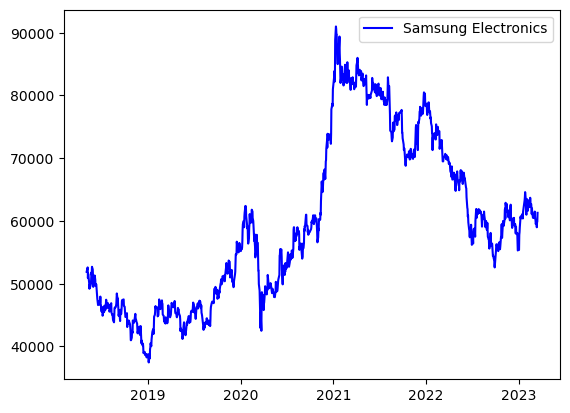

In [13]:
from pandas_datareader import data as pdr ## 파이썬증권데이터분석 #3.4.1
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')   ## 삼성전자
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')       ## 마이크로소프트


import matplotlib.pyplot as plt

plt. plot (sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.legend(loc='best')                        ## 범례 위치를 고정이아닌, 그래프 형태에 따라 최적인 곳에 배치
plt.show()

### histogram

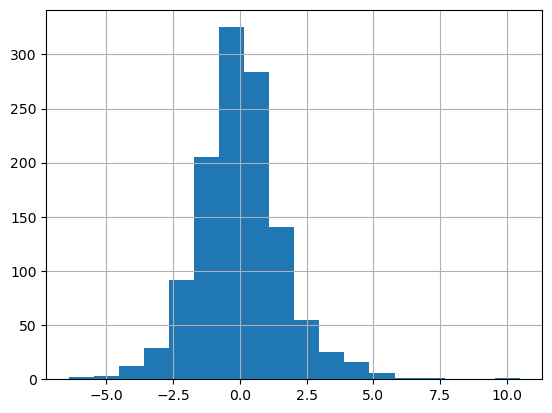

In [12]:
import matplotlib.pyplot as plt   ## 파이썬증권데이터분석 #3.4.2

sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100   #daily percent change
sec_dpc.iloc[0]=0   ## 데이터전처리

plt.hist(sec_dpc, bins=18)
plt.grid(True)
#plt.legend(loc='best')                        ## 범례 위치를 고정이아닌, 그래프 형태에 따라 최적인 곳에 배치
plt.show()

### bar plot

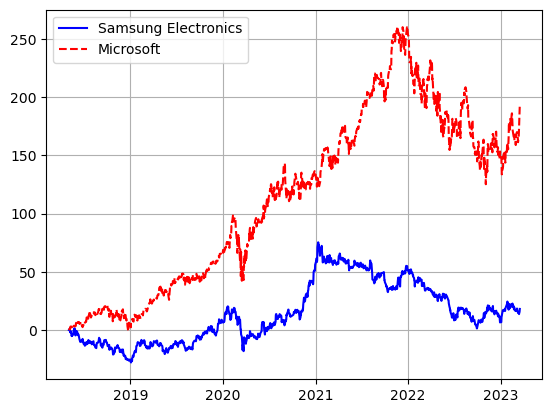

In [14]:
import matplotlib.pyplot as plt   ## 파이썬증권데이터분석 #3.4.3

sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100   #daily percent change
sec_dpc.iloc[0]=0   ## 데이터전처리
sec_dpc_cp=((100+sec_dpc)/100).cumprod()*100-100     # 일간변동률 누적곱 계산

msft_dpc=(msft['Close']/msft['Close'].shift(1)-1)*100   #daily percent change
msft_dpc.iloc[0]=0   ## 데이터전처리
msft_dpc_cp=((100+msft_dpc)/100).cumprod()*100-100     # 일간변동률 누적곱 계산

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')

plt.grid(True)
plt.legend(loc='best')                        ## 범례 위치를 고정이아닌, 그래프 형태에 따라 최적인 곳에 배치
plt.show()

### bar plot - subplot

[*********************100%***********************]  1 of 1 completed


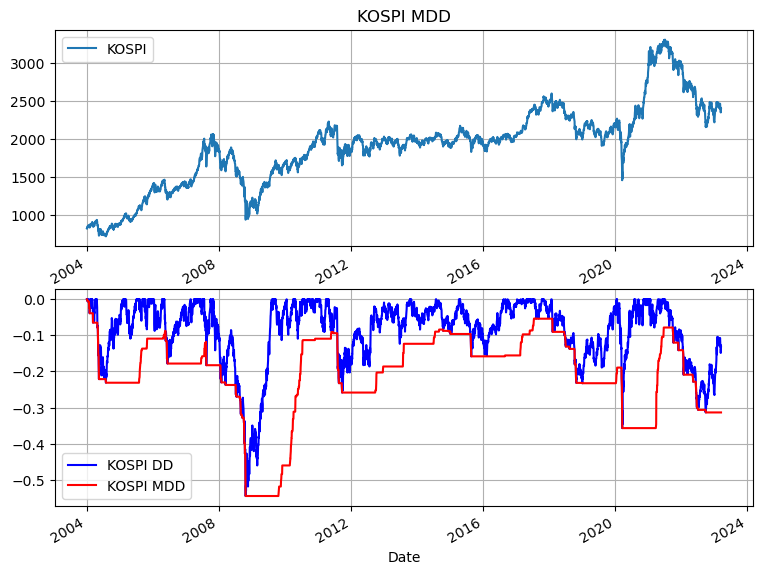

In [16]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252                                       ## 1년치 데이터의 수치를 어림짐작
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()   # 종가 컬럼 중 1년 중 최대값을 추출
drawdown = kospi['Adj Close']/peak - 1.0                         ## 최대값 대비 수정종가의 비율 추출
max_dd = drawdown.rolling(window, min_periods=1).min()           ## drawdown 의 1년 중 최소값을 추출
 
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

### scatter plot
    - scatter plot은 x,y 변수의 갯수가 맞아야 가능

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


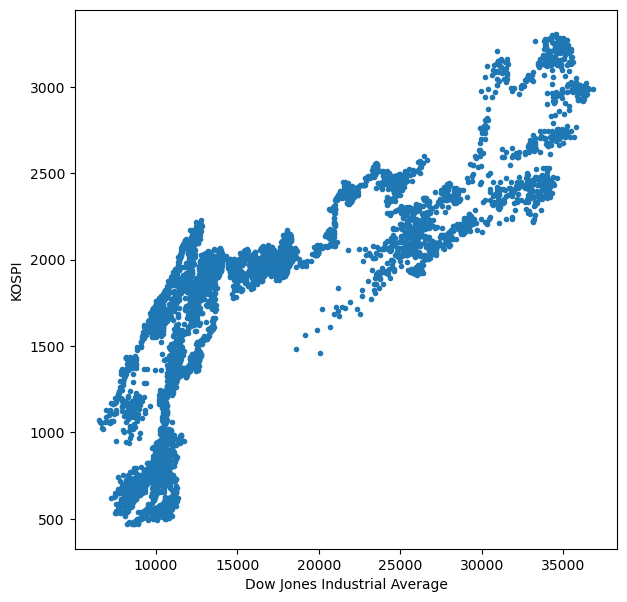

In [15]:
import pandas as pd                     ## 파이썬증권데이터분석 #3.6.3
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']}) #빈칸은 NaN 으로 맞춰짐
df = df.fillna(method='bfill') #기본적으로 다음날 값으로 NaN을 채운다는 것 - 이 경우 맨 마지막날에 NaN이 있으면 이게 채워지지 않음
df = df.fillna(method='ffill') #위의 경우에서 발생하는 마지막 행의 NaN 이 있는 경우 전날 값으로 채워주는 것

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


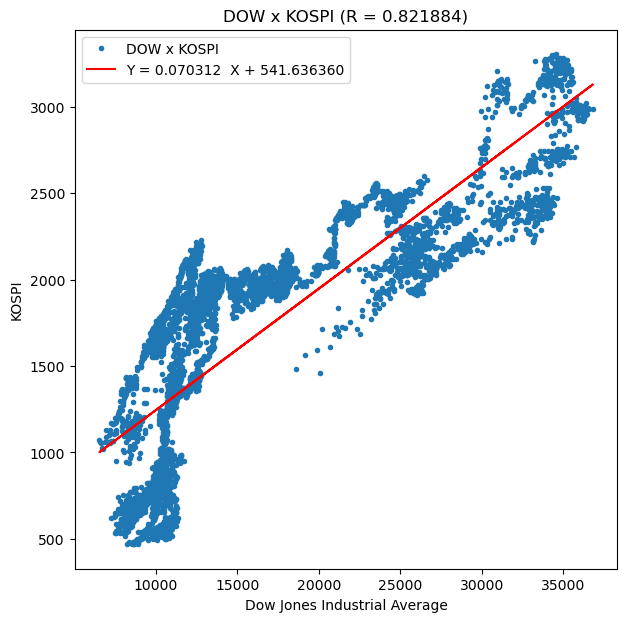

In [17]:
import pandas as pd                         ## 파이썬증권데이터분석 #3.7.4
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')   
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)                            ## 회귀모형 생성
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'    ## 범례에 회귀식을 표현하기 위한 객체 생성

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')                                       ## 산점도
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')         ## 회귀선 
plt.legend(['DOW x KOSPI', regr_line])                          ## 범례
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()